In [1]:
#import packages and classes
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier#importing ML classes
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [2]:
#loading and displaying dataset values
dataset = pd.read_csv("Dataset/train.csv")
dataset

,row_id,time,x,y,direction,congestion
0,0,4/1/1991 0:00,0,0,EB,70
1,1,4/1/1991 0:00,0,0,NB,49
2,2,4/1/1991 0:00,0,0,SB,24
3,3,4/1/1991 0:00,0,1,EB,18
4,4,4/1/1991 0:00,0,1,NB,60
...,...,...,...,...,...,...
848830,848830,9/30/1991 11:40,2,3,NB,54
848831,848831,9/30/1991 11:40,2,3,NE,28
848832,848832,9/30/1991 11:40,2,3,SB,68
848833,848833,9/30/1991 11:40,2,3,SW,17


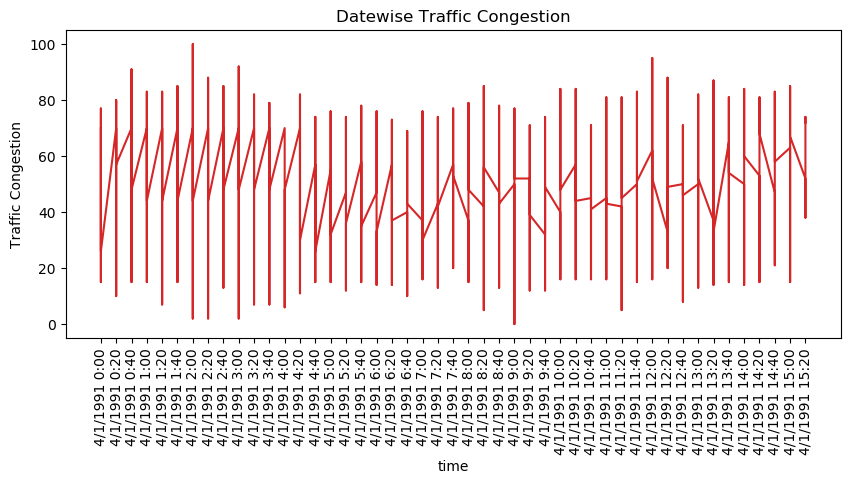

In [3]:
#plotting graph of traffic flow in different dates
#dataset['time'] = pd.to_datetime(dataset['time'], infer_datetime_format=True)
plt.figure(figsize=(10,4), dpi=100)
plt.plot(dataset.time[0:3000], dataset.congestion[0:3000], color='tab:red')
plt.gca().set(title="Datewise Traffic Congestion", xlabel='time', ylabel="Traffic Congestion")
plt.xticks(rotation=90)
plt.show()

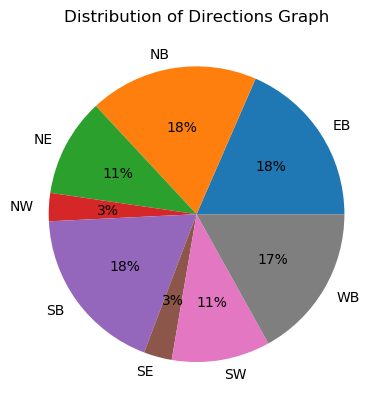

In [4]:
#graphs of different weather condition found in dataset
weather = dataset['direction'].ravel() #extracting weather data
labels, count = np.unique(weather, return_counts=True)
plt.pie(count, labels = labels, autopct='%.0f%%')
plt.title("Distribution of Directions Graph")
plt.show() 

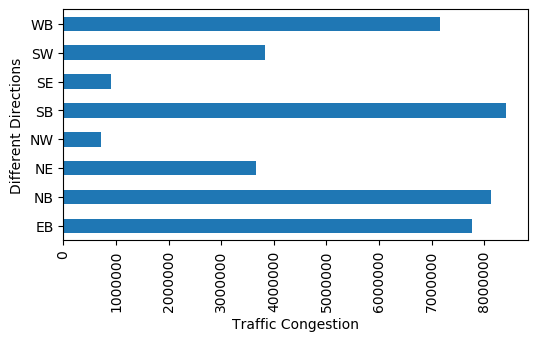

In [5]:
dataset.groupby(['direction'])['congestion'].sum().plot.barh(figsize=(6,3))
plt.xlabel('Traffic Congestion')
plt.ylabel("Different Directions")
plt.xticks(rotation=90)
plt.show()

In [6]:
#finding and displaying any missing or null values
dataset.isnull().sum()

row_id        0
time          0
x             0
y             0
direction     0
congestion    0
dtype: int64

In [7]:
#now convert date column as numeric features by separting them into year, month, day, hour, second and minutes
dataset['time'] = pd.to_datetime(dataset['time'])
dataset['year'] = dataset['time'].dt.year
dataset['month'] = dataset['time'].dt.month
dataset['day'] = dataset['time'].dt.day
dataset['hour'] = dataset['time'].dt.hour
dataset['minute'] = dataset['time'].dt.minute
dataset['second'] = dataset['time'].dt.second
dataset

,row_id,time,x,y,direction,congestion,year,month,day,hour,minute,second
0,0,1991-04-01 00:00:00,0,0,EB,70,1991,4,1,0,0,0
1,1,1991-04-01 00:00:00,0,0,NB,49,1991,4,1,0,0,0
2,2,1991-04-01 00:00:00,0,0,SB,24,1991,4,1,0,0,0
3,3,1991-04-01 00:00:00,0,1,EB,18,1991,4,1,0,0,0
4,4,1991-04-01 00:00:00,0,1,NB,60,1991,4,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
848830,848830,1991-09-30 11:40:00,2,3,NB,54,1991,9,30,11,40,0
848831,848831,1991-09-30 11:40:00,2,3,NE,28,1991,9,30,11,40,0
848832,848832,1991-09-30 11:40:00,2,3,SB,68,1991,9,30,11,40,0
848833,848833,1991-09-30 11:40:00,2,3,SW,17,1991,9,30,11,40,0


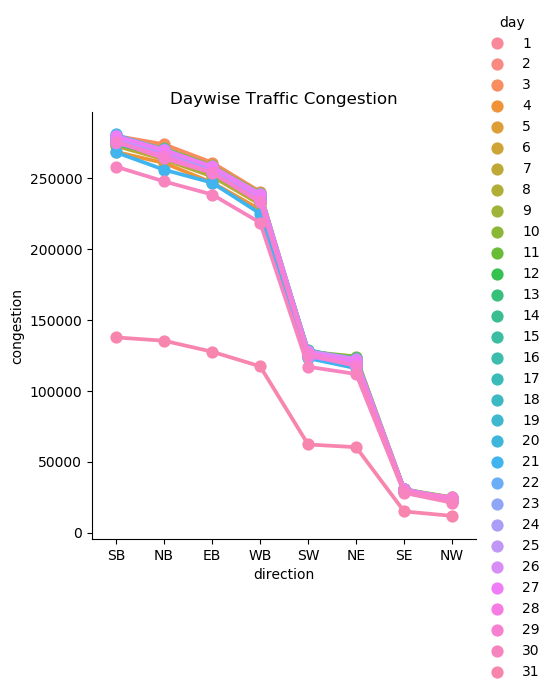

In [8]:
#channels which recive highest comments
data = dataset.groupby(['direction', 'day'])['congestion'].sum().sort_values(ascending=False).reset_index()
sns.catplot(x="direction", y="congestion", hue='day', data=data, kind='point')
plt.title("Daywise Traffic Congestion")
plt.show()

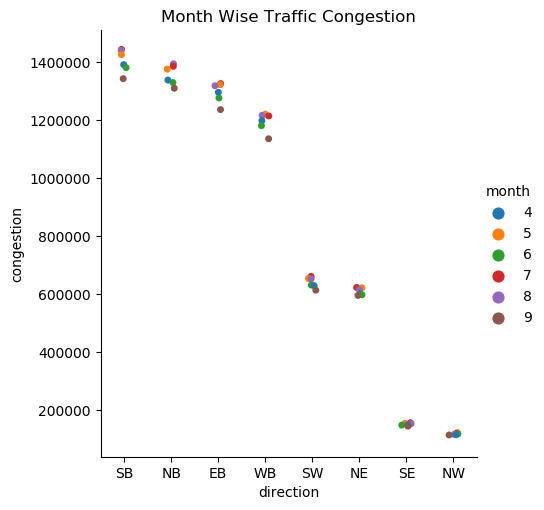

In [9]:
data = dataset.groupby(['direction', 'month'])['congestion'].sum().sort_values(ascending=False).reset_index()
sns.catplot(x="direction", y="congestion", hue='month', data=data)
plt.title("Month Wise Traffic Congestion")
plt.show()

In [10]:
#applying label encoder to convert all non-numeric data to numeric values
labels, count = np.unique(dataset['direction'], return_counts=True)
encoder1 = LabelEncoder()
dataset['direction'] = pd.Series(encoder1.fit_transform(dataset['direction'].astype(str)))#encode all str columns to numeric 
dataset.drop(['time','row_id'], axis = 1,inplace=True)
dataset


,x,y,direction,congestion,year,month,day,hour,minute,second
0,0,0,0,70,1991,4,1,0,0,0
1,0,0,1,49,1991,4,1,0,0,0
2,0,0,4,24,1991,4,1,0,0,0
3,0,1,0,18,1991,4,1,0,0,0
4,0,1,1,60,1991,4,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
848830,2,3,1,54,1991,9,30,11,40,0
848831,2,3,2,28,1991,9,30,11,40,0
848832,2,3,4,68,1991,9,30,11,40,0
848833,2,3,6,17,1991,9,30,11,40,0


In [11]:
#dataset preprocessing and normalization
Y = dataset['direction'].ravel()
dataset.drop(['direction'], axis = 1,inplace=True)
X = dataset.values
X = X[0:15000]
Y = Y[0:15000]
sc1 = MinMaxScaler(feature_range = (0, 1))
X = sc1.fit_transform(X)#normalize train features
#split dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)
print("Total records found in dataset = "+str(X.shape[0]))
print("Total features found in dataset = "+str(X.shape[1]))
print("80% dataset for training : "+str(X_train.shape[0]))
print("20% dataset for testing  : "+str(X_test.shape[0]))
X_train, X_test1, y_train, y_test1 = train_test_split(X, Y, test_size = 0.1)

Total records found in dataset = 15000
Total features found in dataset = 9
80% dataset for training : 12000
20% dataset for testing  : 3000


In [12]:
#define global variables to save accuracy and other metrics
accuracy = []
precision = []
recall = []
fscore = []

In [13]:
#function to calculate all metrics
def calculateMetrics(algorithm, testY, predict):
    p = precision_score(testY, predict,average='macro') * 100
    r = recall_score(testY, predict,average='macro') * 100
    f = f1_score(testY, predict,average='macro') * 100
    a = accuracy_score(testY,predict)*100
    accuracy.append(a)
    precision.append(p)
    recall.append(r)
    fscore.append(f)
    print(algorithm+" Accuracy  : "+str(a))
    print(algorithm+" Precision : "+str(p))
    print(algorithm+" Recall    : "+str(r))
    print(algorithm+" FSCORE    : "+str(f))
    conf_matrix = confusion_matrix(testY, predict)
    fig, axs = plt.subplots(1,2,figsize=(10, 4))
    ax = sns.heatmap(conf_matrix, xticklabels = labels, yticklabels = labels, annot = True, cmap="viridis" ,fmt ="g", ax=axs[0]);
    ax.set_ylim([0,len(labels)])
    axs[0].set_title(algorithm+" Confusion matrix") 

    random_probs = [0 for i in range(len(testY))]
    p_fpr, p_tpr, _ = roc_curve(testY, random_probs, pos_label=1)
    plt.plot(p_fpr, p_tpr, linestyle='--', color='orange',label="True classes")
    ns_fpr, ns_tpr, _ = roc_curve(testY, predict, pos_label=1)
    axs[1].plot(ns_tpr, ns_fpr, linestyle='--', label='Predicted Classes')
    axs[1].set_title(algorithm+" ROC AUC Curve")
    axs[1].set_xlabel('False Positive Rate')
    axs[1].set_ylabel('True Positive rate')
    plt.show()

SVM Accuracy  : 33.2
SVM Precision : 34.06881891649699
SVM Recall    : 34.30437161980135
SVM FSCORE    : 31.41663278272321


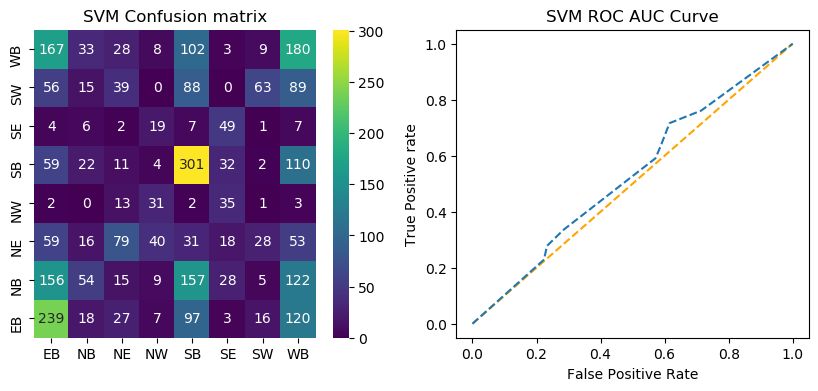

In [14]:
#train machine learning SVM algorithm to predict route with less traffic
svm_cls = svm.SVC()
svm_cls.fit(X_train, y_train)
predict = svm_cls.predict(X_test)
calculateMetrics("SVM", y_test, predict)

Decision Tree Accuracy  : 90.93333333333334
Decision Tree Precision : 92.0454203476142
Decision Tree Recall    : 90.74676776267599
Decision Tree FSCORE    : 91.3128228559935


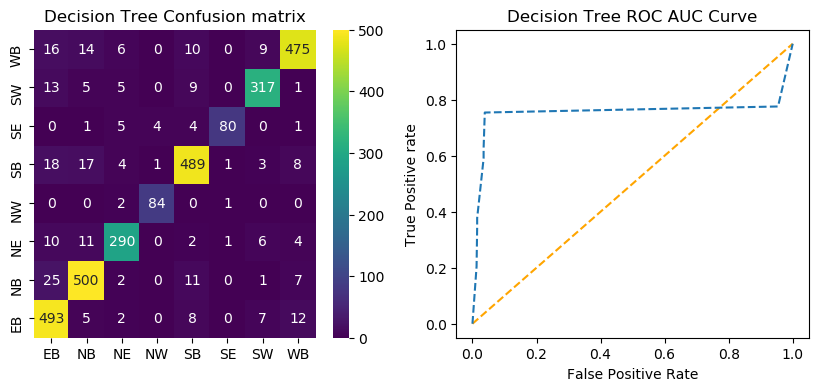

In [15]:
#train machine learning Decision Tree algorithm to predict route with less traffic
dt_cls = DecisionTreeClassifier()
dt_cls.fit(X_train, y_train)
#perform prediction on test data
predict = dt_cls.predict(X_test)
#calculate prediction accuracy and other metrics
calculateMetrics("Decision Tree", y_test, predict)

Random Forest Accuracy  : 90.63333333333333
Random Forest Precision : 91.34481143919047
Random Forest Recall    : 91.03008190617949
Random Forest FSCORE    : 91.17050922629544


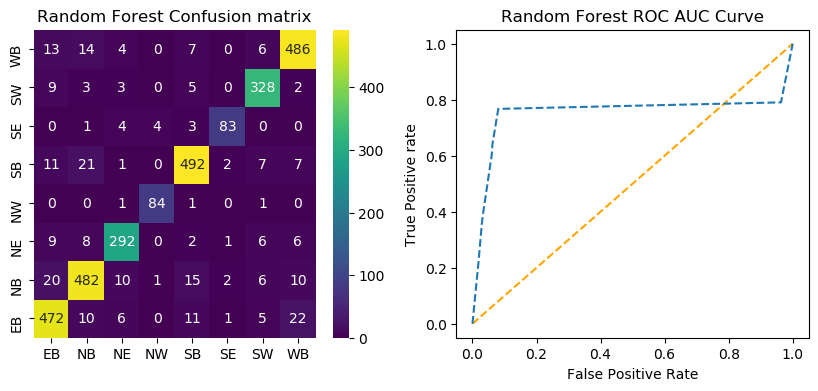

In [16]:
#train machine learning Random Forest algorithm to predict route with less traffic
rf_cls = RandomForestClassifier()
rf_cls.fit(X_train, y_train)
#perform prediction on test data
predict = rf_cls.predict(X_test)
#calculate prediction accuracy and other metrics
calculateMetrics("Random Forest", y_test, predict)

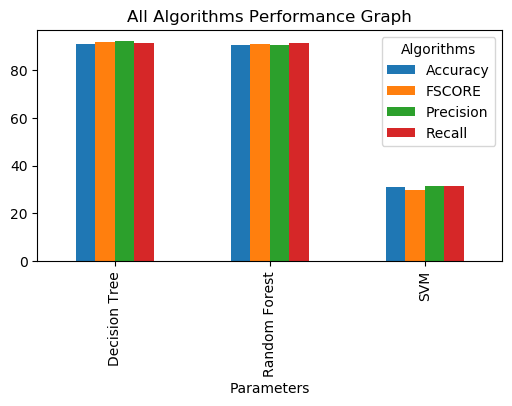

In [17]:
#plot all algorithm performance in tabukar format
df = pd.DataFrame([['SVM','Accuracy',accuracy[0]],['SVM','Precision',precision[0]],['SVM','Recall',recall[0]],['SVM','FSCORE',fscore[0]],
                   ['Decision Tree','Accuracy',accuracy[1]],['Decision Tree','Precision',precision[1]],['Decision Tree','Recall',recall[1]],['Decision Tree','FSCORE',fscore[1]],
                   ['Random Forest','Accuracy',accuracy[2]],['Random Forest','Precision',precision[2]],['Random Forest','Recall',recall[2]],['Random Forest','FSCORE',fscore[2]],
                  ],columns=['Parameters','Algorithms','Value'])
df.pivot("Parameters", "Algorithms", "Value").plot(kind='bar', figsize=(6, 3))
plt.title("All Algorithms Performance Graph")
plt.show()

In [18]:
#display all algorithm performnace
algorithms = ['SVM', 'Decision Tree', 'Random Forest']
data = []
print(len(accuracy))
for i in range(0,3):
    data.append([algorithms[i], accuracy[i], precision[i], recall[i], fscore[i]])
data = pd.DataFrame(data, columns=['Algorithm Name', 'Accuracy', 'Precision', 'Recall', 'FSCORE'])
data    

3


,Algorithm Name,Accuracy,Precision,Recall,FSCORE
0,SVM,30.9,31.229706,31.509089,29.909885
1,Decision Tree,91.0,92.216236,91.303598,91.696669
2,Random Forest,90.5,90.434473,91.225950,90.776829


In [33]:
#function to perform route prediction on test data using congestion
#reading test data from test file and then predicting traffic volume
dataset = pd.read_csv("Dataset/testData.csv")
dataset.fillna(0, inplace = True) #remove missing values
temp = dataset.values
dataset['time'] = pd.to_datetime(dataset['time'])#convert column to date time
dataset['year'] = dataset['time'].dt.year #converting date into year, month
dataset['month'] = dataset['time'].dt.month
dataset['day'] = dataset['time'].dt.day
dataset['hour'] = dataset['time'].dt.hour
dataset['minute'] = dataset['time'].dt.minute
dataset['second'] = dataset['time'].dt.second
dataset.drop(['time'], axis = 1,inplace=True)
testData = dataset.values
#normalizing test data
testData = sc1.transform(testData)
#perform prediction on test
predict = dt_cls.predict(testData)
for i in range(len(predict)):
    print("Test Data = "+str(temp[i])+" Suggested Route is : "+labels[predict[i]])
    print()

NameError: name 'dt_cls' is not defined